In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import os

# Download dataset from Kaggle
dataset_path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")
print("Path to dataset files:", dataset_path)

# Define dataset directories
train_dir = os.path.join(dataset_path, 'train')  # Update path as needed
val_dir = os.path.join(dataset_path, 'valid')  # Update 'val' to 'valid' based on dataset structure

# Load the pre-trained MobileNetV2 model without the top layer
base_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Create a new model on top
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')  # Change to 'softmax' if multiclass
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation and loading
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

# Train the model
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# Save the model
model.save('image_classifier.h5')




100%|██████████| 385M/385M [00:18<00:00, 21.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 107s 400ms/step - accuracy: 0.0202 - loss: -24130.1387 - val_accuracy: 0.0189 - val_loss: -185487.8750
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 83s 346ms/step - accuracy: 0.0175 - loss: -339651.7188 - val_accuracy: 0.0189 - val_loss: -759794.7500
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 84s 352ms/step - accuracy: 0.0199 - loss: -1089719.3750 - val_accuracy: 0.0189 - val_loss: -1700645.7500
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 85s 355ms/step - accuracy: 0.0167 - loss: -2248603.2500 - val_accuracy: 0.0189 - val_loss: -2973528.5000
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 84s 350ms/step - accuracy: 0.0170 - loss: -3759840.5000 - val_accuracy: 0.0189 - val_loss: -4559054.0000
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 84s 350ms/step - accuracy: 0.0167 - loss: -5557076.0000 - val_accuracy: 0.0189 - val_loss: -6422732.5000
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 85s 355ms/step - accuracy: 0.0147 - loss: -7732119.0000 - val_accuracy: 0.0189 - val_loss: -85

FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/train/some_class/some_image.jpg'

In [3]:
import os
test_image_path = os.path.join(train_dir, "some_class", "some_image.jpg")  # Replace with actual class and image name
print("Test image path:", test_image_path)


Test image path: /root/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/train/some_class/some_image.jpg


In [4]:
import os

train_dir = "/root/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/train"
print("Available classes:", os.listdir(train_dir))  # Lists all class folders


Available classes: ['five of diamonds', 'jack of hearts', 'ten of spades', 'queen of diamonds', 'three of clubs', 'two of diamonds', 'two of clubs', 'jack of clubs', 'queen of hearts', 'six of hearts', 'jack of spades', 'eight of diamonds', 'queen of clubs', 'four of spades', 'three of diamonds', 'three of spades', 'king of diamonds', 'five of clubs', 'queen of spades', 'five of spades', 'ten of hearts', 'king of clubs', 'ace of diamonds', 'six of clubs', 'six of diamonds', 'joker', 'ace of spades', 'three of hearts', 'nine of clubs', 'eight of clubs', 'eight of hearts', 'king of spades', 'nine of diamonds', 'ten of diamonds', 'seven of spades', 'nine of hearts', 'jack of diamonds', 'ace of clubs', 'ace of hearts', 'seven of clubs', 'king of hearts', 'six of spades', 'two of hearts', 'four of diamonds', 'nine of spades', 'five of hearts', 'seven of diamonds', 'four of clubs', 'ten of clubs', 'eight of spades', 'four of hearts', 'seven of hearts', 'two of spades']


In [2]:
import os
print("Dataset path contents:", os.listdir(dataset_path))


Dataset path contents: ['train', 'cards.csv', 'test', '53cards-53-(200 X 200)-100.00.h5', 'valid', '14card types-14-(200 X 200)-94.61.h5']


Using test image: /root/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/train/ace of clubs/082.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


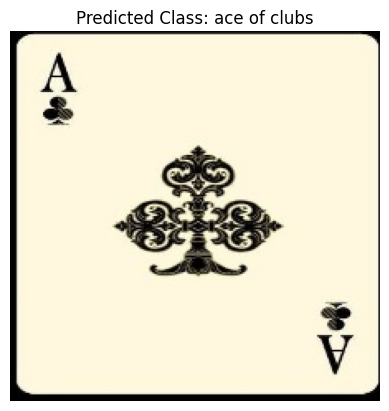

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set the train directory path
train_dir = "/root/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/train"

# Get the class labels (sorted for consistency)
class_labels = sorted(os.listdir(train_dir))  # Ensures class order matches training order

# Select a random class
some_class = class_labels[0]  # Select the first class (change index if needed)
class_path = os.path.join(train_dir, some_class)

# Check if the class folder is empty
if len(os.listdir(class_path)) == 0:
    print(f"No images found in {some_class} directory.")
else:
    # Pick the first image from the selected class
    image_name = os.listdir(class_path)[0]
    image_path = os.path.join(class_path, image_name)

    print("Using test image:", image_path)

    # Function to predict the class
    def predict_image(image_path, model):
        img = load_img(image_path, target_size=(224, 224))  # Load image
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model
        prediction = model.predict(img_array)  # Predict

        # Get predicted class index
        predicted_class_index = np.argmax(prediction)  # Use argmax for multiclass

        # Convert index to actual class name
        predicted_class_name = class_labels[predicted_class_index]

        return predicted_class_name

    # Get prediction
    predicted_class = predict_image(image_path, model)

    # Display the image with prediction
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()
